In [1]:
import numpy as np
import pandas as pd

In [2]:
#import data
import os
dataset = np.array([])
def data_collect(name):
    df = pd.read_pickle(os.path.abspath(name))
    df_labels = df['label']
    df_labels = np.reshape(df_labels,(len(df['label']),1))
    data = np.concatenate((df['signal']['chest']['ACC'],df['signal']['chest']['ECG'],df['signal']['chest']['EMG'],df['signal']['chest']['EDA'],df['signal']['chest']['Temp'],df['signal']['chest']['Resp'],df_labels),axis = 1) 
    data = np.array([data[i] for i in range(len(data[:,8])) if 4 >= data[i,8] > 0 ])
    return data
for i in range(2,6):
    name = 'C:\\Users\\DELL\\Desktop\\PR\\WESAD\\S'+str(i) + '\\S'+str(i)+'.pkl'
    if i == 2 : 
        dataset = data_collect(name)
        print(i)
    else :
        if i != 12 :
            dataset = np.concatenate((dataset,data_collect(name)),axis = 0)
            print(i)

2
3
4
5


In [3]:
#convert to data frame
df = pd.DataFrame({'ACC_X':dataset[:,0],'ACC_Y':dataset[:,1],'ACC_Z':dataset[:,2],'ECG':dataset[:,3],'EDA':dataset[:,4],'EMG':dataset[:,5],'RESP':dataset[:,6],'TEMP':dataset[:,7],'TARGET':dataset[:,8]})

In [4]:
df.shape

(8263501, 9)

In [5]:
#defining target and seperating it 
target=df['TARGET']
del df['TARGET']

In [6]:
target.columns = (['TARGET'])

In [7]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
data_set_us, target_us = rus.fit_resample(df, target)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is

In [8]:
data_us = pd.DataFrame(data = data_set_us,columns = ['acc_x','acc_y','acc_z','ecg','eda','emg','resp','temp'])
target_set_us = pd.DataFrame(data = target_us,columns = ['target'])

In [9]:
x = [data_us,target_set_us]
data_com = pd.concat(x,axis = 1) 
data_com = pd.DataFrame(data = data_com,columns = ['acc_x','acc_y','acc_z','ecg','eda','emg','resp','temp','target'])

In [10]:
data_copy = data_com

In [11]:
#removing duplicates
data_copy = data_copy.drop_duplicates(keep = 'first')

In [12]:
from scipy import stats
zvalue = stats.zscore(data_copy)

In [13]:
data_free_dup = data_copy

In [14]:
targ = data_free_dup['target']
del data_free_dup['target']

In [15]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
data_z, target = rus.fit_resample(data_free_dup, targ)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
data_final = pd.DataFrame(data = data_z,columns = ['acc_x','acc_y','acc_z','ecg','eda','emg','resp','temp'])
targ_final = pd.DataFrame(data = target,columns = ['target'])

In [17]:
data_final

,acc_x,acc_y,acc_z,ecg,eda,emg,resp,temp
0,0.8382,-0.0392,-0.3918,-0.044815,-0.018265,4.978943,34.508179,-0.428772
1,0.6218,-0.1040,-0.7208,-0.239685,0.000183,3.502655,28.833862,-2.207947
2,0.8350,0.0036,-0.3914,0.009750,-0.002975,3.950500,34.632446,-0.236511
3,0.8762,-0.0108,-0.3338,-0.109314,-0.004303,6.618881,30.965424,-1.091003
4,0.8514,-0.0536,-0.3550,-0.030624,-0.007095,5.942154,34.436218,0.947571
...,...,...,...,...,...,...,...,...
4152179,0.5410,-0.1892,-0.7874,-0.097595,-0.007553,1.466370,33.254547,2.070618
4152180,0.4968,-0.1758,-0.8110,-0.039780,-0.001877,2.534103,33.756531,2.571106
4152181,0.8954,-0.0066,-0.1914,-0.007736,0.003250,7.122421,32.926788,0.920105
4152182,0.6018,-0.1146,-0.7318,-0.230392,-0.006042,0.924683,31.387054,-1.463318


In [18]:
targ_final

,target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4152179,4.0
4152180,4.0
4152181,4.0
4152182,4.0


In [19]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
data_scaled = stdscaler.fit(data_final)

In [20]:
data_scale=data_scaled.transform(data_final)

In [21]:
data_scale=pd.DataFrame(data=data_scale,columns=['acc_x','acc_y','acc_z','ecg','eda','emg','resp','temp'])

In [22]:
data_scale


,acc_x,acc_y,acc_z,ecg,eda,emg,resp,temp
0,0.275920,0.509863,-0.148193,-0.196209,-1.131134,0.183482,0.992207,-0.156756
1,-1.400865,-0.061470,-1.428737,-1.025787,0.229388,-0.305661,-2.529383,-0.734542
2,0.251126,0.887226,-0.146636,0.036081,-0.003555,-0.157275,1.069330,-0.094319
3,0.570365,0.760262,0.077556,-0.470786,-0.101459,0.726849,-1.206495,-0.371815
4,0.378202,0.382900,-0.004959,-0.135798,-0.307394,0.502626,0.947547,0.290211
...,...,...,...,...,...,...,...,...
4152179,-2.026947,-0.812668,-1.687960,-0.420898,-0.341154,-0.980351,0.214179,0.654921
4152180,-2.369434,-0.694522,-1.779816,-0.174772,0.077468,-0.626575,0.525720,0.817454
4152181,0.719138,0.797293,0.631810,-0.038361,0.455579,0.893689,0.010766,0.281292
4152182,-1.555836,-0.154929,-1.471551,-0.986228,-0.229746,-1.159830,-0.944823,-0.492724


In [23]:
#splitting the data into testing and training
from sklearn.model_selection import train_test_split

In [24]:
#class binarization i.e is binarising target vector
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
b_target = lb.fit_transform(targ_final)

In [25]:
target_final = pd.DataFrame(data = b_target)

In [26]:
#spliting
data_train, data_test, targ_train, targ_test = train_test_split( data_scale,targ_final, test_size=0.2, random_state=2)

In [27]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn import svm
from itertools import product

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
kf = KFold(n_splits = 5)
i = 0
for train,test in kf.split(data_train):
    knn =  KNeighborsClassifier(n_neighbors=3)
    #feature selection
    data_t,data_v,targ_t,targ_v = data_train.iloc[train,:],data_train.iloc[test,:],targ_train.iloc[train,:],targ_train.iloc[test,:]
    knn.fit(data_t,targ_t)
    i+=1
    print(i)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


1


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


2


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


3


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


4


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


5


In [32]:
import matplotlib.pyplot as plt

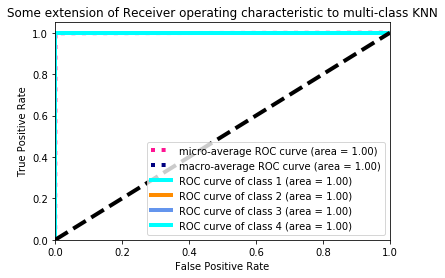

In [48]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
targ_score = knn.predict(data_test)
targ_test_np = np.array(targ_test)
targ_score = np.reshape(targ_score,(len(targ_score),1))
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(targ_test_np)
targ_score = lb.transform(targ_score)
targ_test_np = lb.transform(targ_test_np)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1,5):
    fpr[i], tpr[i], _ = roc_curve(targ_test_np[i,:], targ_score[i,:])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(targ_test_np.ravel(), targ_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
n_classes = 4
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes+1)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(1,n_classes+1):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw = 4
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class KNN')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
acc = lda.score(data_test,targ_test)
print("accuracy : ")
print(acc)
knn_pred=lda.predict(data_test)
print(confusion_matrix(knn_pred,targ_test))
print("f1 score")
print(f1_score(knn_pred,targ_test,average = 'macro'))

accuracy : 
0.9976072838758389
[[207013     11     42     58]
 [    69 206800    331     36]
 [   202    645 207566    202]
 [   192      2    197 207071]]
f1 score
0.9976091313691338


In [31]:
acc = lda.score(data_test,targ_test)

In [32]:
from sklearn.metrics import f1_score
knn_predict=lda.predict(data_test)
print(f1_score(knn_predict,targ_test,average = 'macro'))

0.9976091313691338


In [33]:
from sklearn.metrics import confusion_matrix
print("For KNN(n = 3)")
knn_pred = lda.predict(data_test)
print(confusion_matrix(knn_pred,targ_test))

For KNN(n = 3)
[[207013     11     42     58]
 [    69 206800    331     36]
 [   202    645 207566    202]
 [   192      2    197 207071]]


In [35]:
#Training data using LDA
kf = KFold(n_splits = 5)
for train,test in kf.split(data_train):
    lda = LinearDiscriminantAnalysis()
    #feature selection
    data_t,data_v,targ_t,targ_v = data_train.iloc[train,:],data_train.iloc[test,:],targ_train.iloc[train,:],targ_train.iloc[test,:]
    lda.fit(data_t,targ_t)
    print('hello')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


In [36]:
from sklearn.metrics import roc_curve, auc
targ_score = lda.predict(data_test)
targ_test_np = np.array(targ_test)

In [37]:
targ_score.shape
targ_score = np.reshape(targ_score,(len(targ_score),1))

In [38]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(targ_test_np)
targ_score = lb.transform(targ_score)
targ_test_np = lb.transform(targ_test_np)

In [39]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1,5):
    fpr[i], tpr[i], _ = roc_curve(targ_test_np[i,:], targ_score[i,:])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [40]:
fpr["micro"], tpr["micro"], _ = roc_curve(targ_test_np.ravel(), targ_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [41]:
import matplotlib.pyplot as plt

In [42]:
fpr

{1: array([0., 0., 1.]),
 2: array([0.        , 0.33333333, 1.        ]),
 3: array([0.        , 0.33333333, 1.        ]),
 4: array([0.        , 0.33333333, 1.        ]),
 'micro': array([0.        , 0.14993993, 1.        ])}

In [43]:
tpr

{1: array([0., 1., 1.]),
 2: array([0., 0., 1.]),
 3: array([0., 0., 1.]),
 4: array([0., 0., 1.]),
 'micro': array([0.        , 0.55018021, 1.        ])}

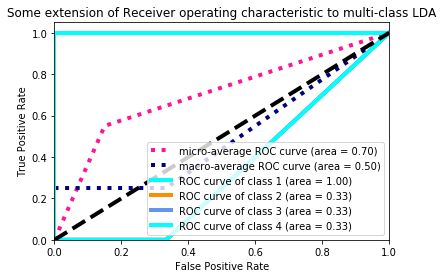

In [46]:
n_classes = 4
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes+1)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(1,n_classes+1):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class LDA')
plt.legend(loc="lower right")
plt.show()

In [35]:
print("for LDA : ")
lda_pred = lda.predict(data_test)
print(confusion_matrix(lda_pred,targ_test))
print("accuracy:")
acc = lda.score(data_test,targ_test)
print(acc)
print("f1 score")
print(f1_score(lda_pred,targ_test,average='macro'))

for LDA : 
[[148090  14001  40206  25770]
 [   793 106295  52794  26040]
 [ 48978  87159  62956  16008]
 [  9615      3  52180 139549]]
accuracy:
0.5501802063251036
f1 score
0.5502024907334299


In [36]:
from sklearn.feature_selection import RFE
model = LinearDiscriminantAnalysis()
rfe = RFE(model)
fit = rfe.fit(data_scale,targ_final)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 4
Selected Features: [ True False  True False False  True  True False]
Feature Ranking: [1 2 1 5 4 1 1 3]


In [38]:
data_lda_select = data_scale.copy()
targ_lda_select = targ_final.copy()

In [39]:
del data_lda_select['temp']
del data_lda_select['ecg']
del data_lda_select['eda']
del data_lda_select['acc_y']


In [40]:
data_lda_train, data_lda_test, targ_lda_train, targ_lda_test = train_test_split( data_lda_select,targ_final, test_size=0.2, random_state=2)

In [41]:
#Training data using LDA
kf = KFold(n_splits = 5)
for train,test in kf.split(data_lda_train):
    lda_sel = LinearDiscriminantAnalysis()
    #feature selection
    data_t,data_v,targ_t,targ_v = data_lda_train.iloc[train,:],data_lda_train.iloc[test,:],targ_lda_train.iloc[train,:],targ_lda_train.iloc[test,:]
    lda_sel.fit(data_t,targ_t)
    print('hello')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


In [42]:
print("for LDA after feature selection : ")
lda_sel_pred = lda_sel.predict(data_lda_test)
print(confusion_matrix(lda_sel_pred,targ_lda_test))
print("accuracy:")
acc = lda_sel.score(data_lda_test,targ_lda_test)
print(acc)
print("f1 score")
print(f1_score(lda_sel_pred,targ_lda_test,average='macro'))

for LDA after feature selection : 
[[100338   7181  38205  28607]
 [   602 105754  52818  25247]
 [ 82807  94519  65065  15938]
 [ 23729      4  52048 137575]]
accuracy:
0.49218905227006987
f1 score
0.49957175417017424


In [95]:
#Training data using QDA
kf = KFold(n_splits = 5)
for train,test in kf.split(data_train):
    qda = QuadraticDiscriminantAnalysis()
    #feature selection
    data_t,data_v,targ_t,targ_v = data_train.iloc[train,:],data_train.iloc[test,:],targ_train.iloc[train,:],targ_train.iloc[test,:]
    qda.fit(data_t,targ_t)
    print('hello')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hello


In [96]:
print("for QDA : ")
qda_pred = qda.predict(data_test)
print(confusion_matrix(qda_pred,targ_test))
print("accuracy:")
acc = qda.score(data_test,targ_test)
print(acc)
print("f1 score")
print(f1_score(qda_pred,targ_test,average='macro'))

for QDA : 
[[181949    232   3017   1747]
 [  1180 179548  37402   3608]
 [ 19897  27515 145729  13850]
 [  4450    163  21988 188162]]
accuracy:
0.8373759839698858
f1 score
0.8382166211757373


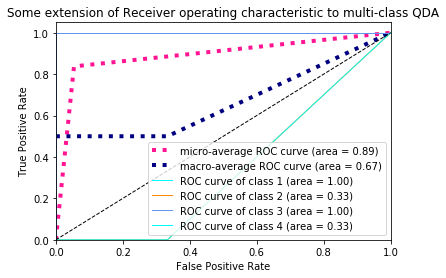

In [97]:
from sklearn.metrics import roc_curve, auc
targ_score = qda.predict(data_test)
targ_test_np = np.array(targ_test)
targ_score = np.reshape(targ_score,(len(targ_score),1))
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(targ_test_np)
targ_score = lb.transform(targ_score)
targ_test_np = lb.transform(targ_test_np)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1,5):
    fpr[i], tpr[i], _ = roc_curve(targ_test_np[i,:], targ_score[i,:])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(targ_test_np.ravel(), targ_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
n_classes = 4
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes+1)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(1,n_classes+1):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class QDA')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
kf = KFold(n_splits = 5)
for train,test in kf.split(data_train):
    dtc = DecisionTreeClassifier(random_state=1)
    data_t,data_v,targ_t,targ_v = data_train.iloc[train,:],data_train.iloc[test,:],targ_train.iloc[train,:],targ_train.iloc[test,:]
    dtc.fit(data_t,targ_t)
    print('hello')from sklearn.metrics import roc_curve, auc


hello
hello
hello
hello
hello


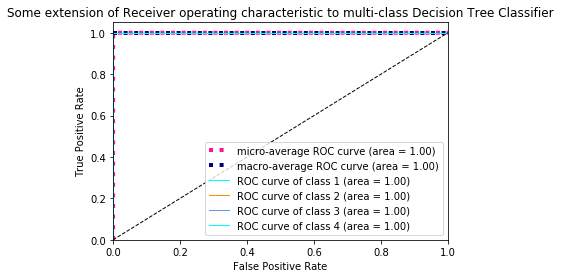

In [100]:
targ_score = dtc.predict(data_test)
targ_test_np = np.array(targ_test)
targ_score = np.reshape(targ_score,(len(targ_score),1))
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(targ_test_np)
targ_score = lb.transform(targ_score)
targ_test_np = lb.transform(targ_test_np)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1,5):
    fpr[i], tpr[i], _ = roc_curve(targ_test_np[i,:], targ_score[i,:])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(targ_test_np.ravel(), targ_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
n_classes = 4
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes+1)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(1,n_classes+1):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

In [47]:
print("for DecisionTree Classifier : ")
dtc_pred = dtc.predict(data_test)
print(confusion_matrix(dtc_pred,targ_test))
print("accuracy:")
acc = dtc.score(data_test,targ_test)
print(acc)
print("f1 score")
print(f1_score(dtc_pred,targ_test,average='macro'))

for DecisionTree Classifier : 
[[207465      6      8      2]
 [     0 207448      5      1]
 [     5      4 208096     19]
 [     6      0     27 207345]]
accuracy:
0.9999000526228962
f1 score
0.9999000998949173


In [48]:
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier(random_state=1)
rfe_dt = RFE(model)
dt_fit = rfe_dt.fit(data_scale,targ_final)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print("Num Features: %d"% dt_fit.n_features_)
print("Selected Features: %s"% dt_fit.support_)
print("Feature Ranking: %s"% dt_fit.ranking_)

Num Features: 4
Selected Features: [ True False  True False False  True  True False]
Feature Ranking: [1 2 1 4 5 1 1 3]


In [52]:
data_dt_select = data_scale.copy()

In [53]:
del data_dt_select['acc_y']
del data_dt_select['ecg']
del data_dt_select['eda']
del data_dt_select['temp']

In [54]:
data_dt_train, data_dt_test, targ_dt_train, targ_dt_test = train_test_split( data_dt_select,targ_final, test_size=0.2, random_state=2)

In [55]:
kf = KFold(n_splits = 5)
for train,test in kf.split(data_dt_train):
    dtc_sel = DecisionTreeClassifier(random_state=1)
    data_t,data_v,targ_t,targ_v = data_dt_train.iloc[train,:],data_dt_train.iloc[test,:],targ_dt_train.iloc[train,:],targ_dt_train.iloc[test,:]
    dtc_sel.fit(data_t,targ_t)
    print('hello')

hello
hello
hello
hello
hello


In [56]:
print("for DecisionTree Classifier after feature selection : ")
dtc_sel_pred = dtc_sel.predict(data_dt_test)
print(confusion_matrix(dtc_sel_pred,targ_dt_test))
print("accuracy:")
acc = dtc_sel.score(data_dt_test,targ_dt_test)
print(acc)
print("f1 score")
print(f1_score(dtc_sel_pred,targ_dt_test,average='macro'))

for DecisionTree Classifier after feature selection : 
[[207428      5     20     15]
 [     6 207448      5      0]
 [    24      5 207825    294]
 [    18      0    286 207058]]
accuracy:
0.9991835623894407
f1 score
0.9991840595754595


In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
kf = KFold(n_splits = 5)
for train,test in kf.split(data_train):
    nn =  MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=15, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    data_t,data_v,targ_t,targ_v = data_train.iloc[train,:],data_train.iloc[test,:],targ_train.iloc[train,:],targ_train.iloc[test,:]
    nn.fit(data_t,targ_t)
    print('hello')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.69442045
Iteration 2, loss = 0.69698504
Iteration 3, loss = 0.69616351
Iteration 4, loss = 0.69583658
Iteration 5, loss = 0.69604767
Iteration 6, loss = 0.69576389
Iteration 7, loss = 0.69598561
Iteration 8, loss = 0.69631042
Iteration 9, loss = 0.69609576
Iteration 10, loss = 0.69615931
Iteration 11, loss = 0.69577318
Iteration 12, loss = 0.69602091
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.60715380
Iteration 2, loss = 0.58493755
Iteration 3, loss = 0.58443837
Iteration 4, loss = 0.58453755
Iteration 5, loss = 0.58444132
Iteration 6, loss = 0.58429716
Iteration 7, loss = 0.58409993
Iteration 8, loss = 0.58420497
Iteration 9, loss = 0.58417482
Iteration 10, loss = 0.58432834
Iteration 11, loss = 0.58379345
Iteration 12, loss = 0.58439555
Iteration 13, loss = 0.58459682
Iteration 14, loss = 0.58430507
Iteration 15, loss = 0.58423249
hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.68487997
Iteration 3, loss = 0.68499400
Iteration 4, loss = 0.68519400
Iteration 5, loss = 0.68522335
Iteration 6, loss = 0.68493933
Iteration 7, loss = 0.68526572
Iteration 8, loss = 0.68486544
Iteration 9, loss = 0.68483261
Iteration 10, loss = 0.68535940
Iteration 11, loss = 0.68528270
Iteration 12, loss = 0.68497751
Iteration 13, loss = 0.68476397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.68494486
Iteration 3, loss = 0.68516281
Iteration 4, loss = 0.68506471
Iteration 5, loss = 0.68531561
Iteration 6, loss = 0.68542783
Iteration 7, loss = 0.68554287
Iteration 8, loss = 0.68524648
Iteration 9, loss = 0.68542702
Iteration 10, loss = 0.68531338
Iteration 11, loss = 0.68621749
Iteration 12, loss = 0.68555086
Iteration 13, loss = 0.68499134
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.70931370
Iteration 2, loss = 0.69855146
Iteration 3, loss = 0.69831658
Iteration 4, loss = 0.69814626
Iteration 5, loss = 0.69813743
Iteration 6, loss = 0.69798895
Iteration 7, loss = 0.69841615
Iteration 8, loss = 0.69806926
Iteration 9, loss = 0.69805833
Iteration 10, loss = 0.69812297
Iteration 11, loss = 0.69825040
Iteration 12, loss = 0.69774716
Iteration 13, loss = 0.69785078
Iteration 14, loss = 0.69811045
Iteration 15, loss = 0.69824112
hello


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

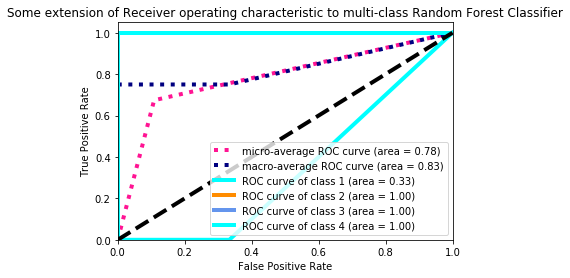

In [35]:
targ_score = nn.predict(data_test)
targ_test_np = np.array(targ_test)
targ_score = np.reshape(targ_score,(len(targ_score),1))
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(targ_test_np)
targ_score = lb.transform(targ_score)
targ_test_np = lb.transform(targ_test_np)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1,5):
    fpr[i], tpr[i], _ = roc_curve(targ_test_np[i,:], targ_score[i,:])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(targ_test_np.ravel(), targ_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
n_classes = 4
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes+1)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(1,n_classes+1):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [53]:
acc = nn.score(data_test,targ_test)

In [59]:
print("Artificial Neural Networs : ")
nn_pred = nn.predict(data_test)
print(confusion_matrix(nn_pred,targ_test))
print("accuracy:")
acc = nn.score(data_test,targ_test)
print(acc)
print("f1 score")
print(f1_score(nn_pred,targ_test,average='macro'))

Artificial Neural Networs : 
[[102787    418  51476  24657]
 [   387 142080  22990      0]
 [  8509  64836 132461    337]
 [ 95793    124   1209 182373]]
accuracy:
0.6739836977398647
f1 score
0.6705248965306124


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
kf = KFold(n_splits = 5)
for train,test in kf.split(data_train):
    rf = RandomForestClassifier(max_depth=2, random_state=1)
    data_t,data_v,targ_t,targ_v = data_train.iloc[train,:],data_train.iloc[test,:],targ_train.iloc[train,:],targ_train.iloc[test,:]
    rf.fit(data_t,targ_t)
    print('hello')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


KeyboardInterrupt: 

In [30]:
print("Random Forest Classifier : ")
rf_pred = rf.predict(data_test)
print(confusion_matrix(rf_pred,targ_test))
print("accuracy:")
acc = rf.score(data_test,targ_test)
print(acc)
print("f1 score")
print(f1_score(rf_pred,targ_test,average='macro'))

Random Forest Classifier : 
[[203181   1758  93450  77766]
 [  3869 205690  64292  28873]
 [     3      6  50367     13]
 [   423      4     27 100715]]
accuracy:
0.6742871524269752
f1 score
0.6362778277025583
